<a href="https://colab.research.google.com/github/geenordconsult/GEENORD-PROJECTS/blob/main/HEART_DISEASE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease prediction with machine learning**



### **Import libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import train dataset

In [4]:
train_dataset = pd.read_csv('Train Dataset.csv')
train_dataset

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1


In [ ]:
train_dataset.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [5]:
train_dataset.tail()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1
7302,15363,38,0,0,193,487,0,1,154,1,4.8,1,4,3,1


### **Exploratory Data Analysis**

In [6]:
# check size of dataset
train_dataset.shape

(7303, 15)

In [7]:
# check null values
train_dataset.isna().sum()

,0
Id,0
Age,0
Sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [8]:
# check for duplicated rows
train_dataset.duplicated().sum()

np.int64(0)

In [9]:
# drop the id column
train_dataset.drop('Id', axis=1, inplace=True)
train_dataset.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [ ]:
# check for unique values in each column
train_dataset.nunique()

,0
Age,49
Sex,2
cp,4
trestbps,107
chol,439
fbs,2
restecg,3
thalach,132
exang,2
oldpeak,63


In [ ]:
# check description
train_dataset.describe()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Data visualisation**

<Axes: >

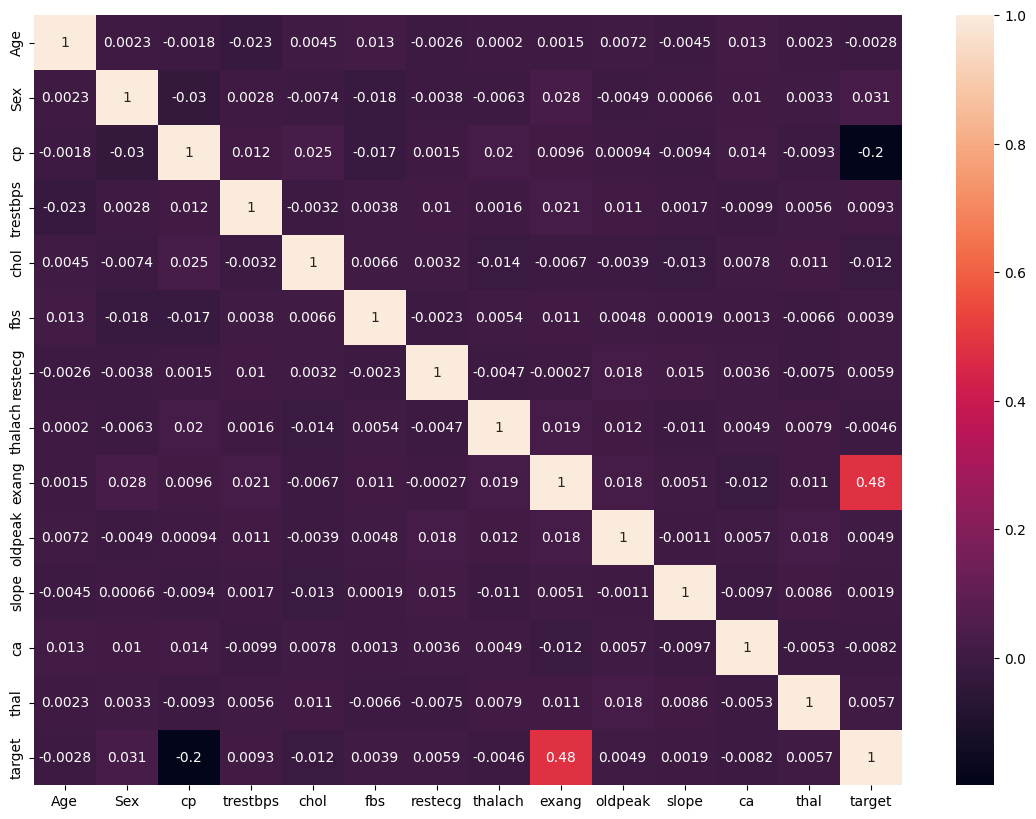

In [ ]:
# check correlation in the dataset
correlation = train_dataset.corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation, annot=True)

In [ ]:
# check for outliers using sns

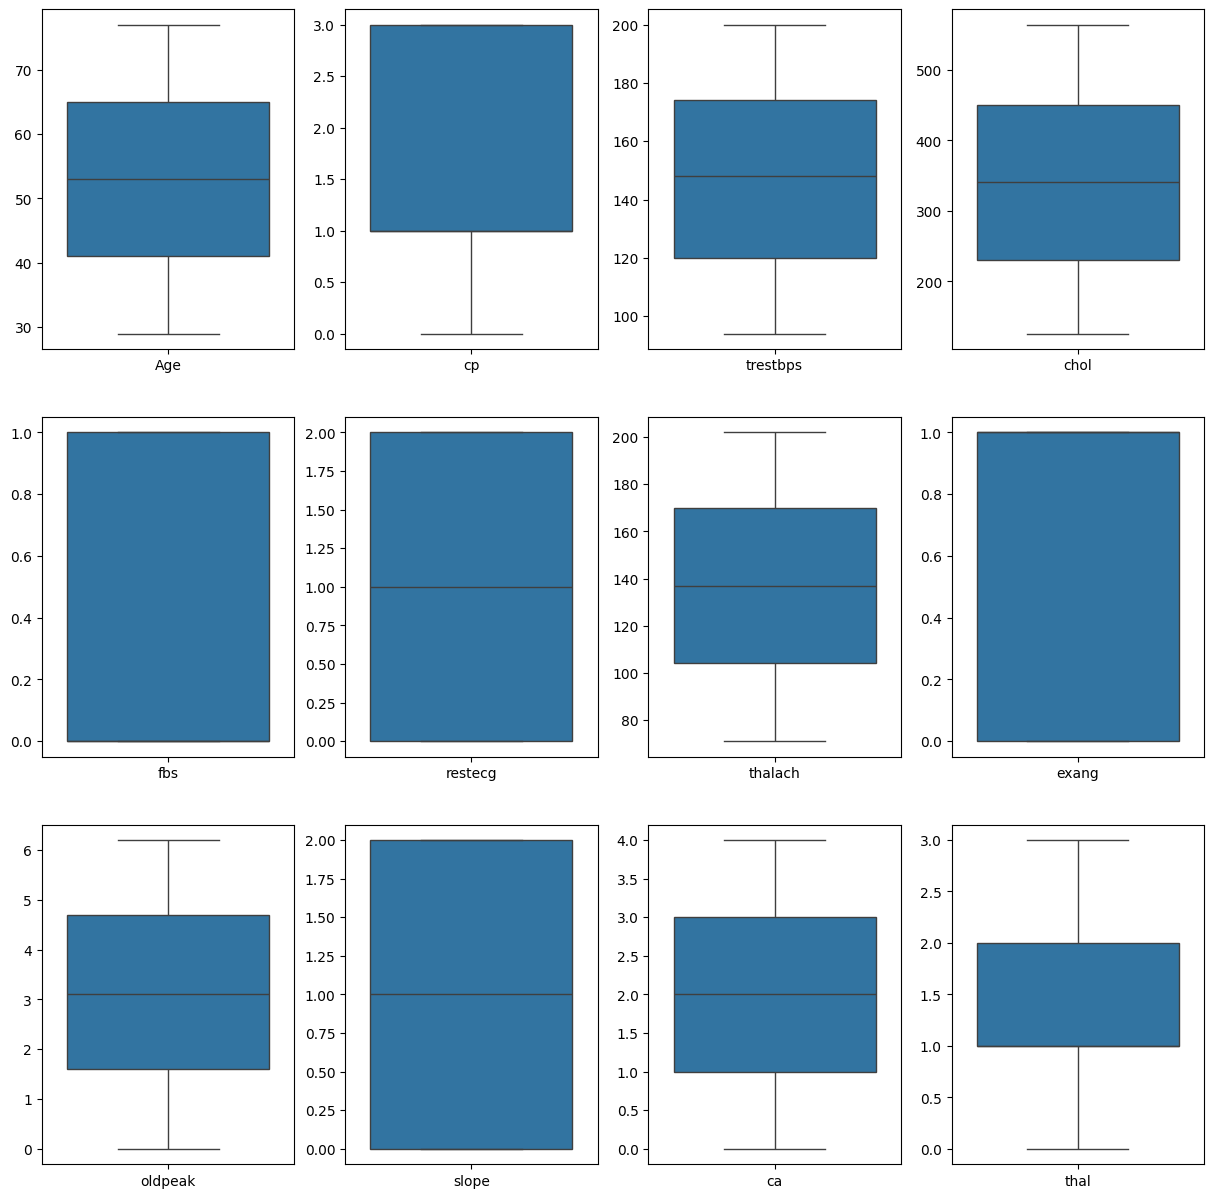

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Create a boxplot for all columns
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
plt.figure(figsize=(10, 6))

# Flatten the axes array
axes = axes.flatten()

columns = ['Age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

for plot, column in zip(axes, columns):
    sns.boxplot(data=train_dataset[[column]], ax=plot)

## **Dataset Spliting**

In [ ]:
# split dataset into target and variable
X = train_dataset.drop('target', axis=1)
y = train_dataset['target']

In [ ]:
X.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,33,0,1,158,205,1,0,154,0,1.5,1,4,1
1,53,1,2,198,154,0,1,104,0,0.8,2,1,0
2,37,1,2,101,202,1,0,155,0,2.1,1,3,1
3,75,0,0,113,306,1,2,88,1,4.9,0,2,2
4,35,1,2,139,419,1,1,166,1,0.9,2,4,0


### **Feature Scaling**

In [ ]:
# scale the features
from sklearn.preprocessing import StandardScaler

def scale(df):
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  df = pd.DataFrame(df)
  return df

X = scale(X)

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.422113,-0.999316,-0.450493,0.339337,-1.082671,1.013927,-1.241813,0.458684,-1.006457,-0.910004,0.010388,1.404493,-0.451242
1,-0.012173,1.000685,0.445952,1.625618,-1.483352,-0.986264,-0.015946,-0.852298,-1.006457,-1.300839,1.234027,-0.722488,-1.349666
2,-1.140125,1.000685,0.445952,-1.493613,-1.106241,1.013927,-1.241813,0.484904,-1.006457,-0.575002,0.010388,0.695499,-0.451242
3,1.538762,-0.999316,-1.346938,-1.107729,-0.289166,1.013927,1.209920,-1.271812,0.993585,0.988337,-1.213250,-0.013494,0.447182
4,-1.281119,1.000685,0.445952,-0.271646,0.598618,1.013927,-0.015946,0.773320,0.993585,-1.245005,1.234027,1.404493,-1.349666


In [ ]:
# y = y.astype('object')
y.head()

,target
0,1
1,0
2,1
3,1
4,1


### **Model Training**

In [ ]:
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
# !pip install catboost

In [ ]:
from catboost import CatBoostClassifier

# Define the model

# 0.841975308 accuracy
catboost_params = {
    'iterations': 5,  # Boosting rounds
    'learning_rate': 0.05,  # Step size
    'depth': 6,  # Tree depth
    'l2_leaf_reg': 3,  # L2 regularization
    'subsample': 0.8,  # Data subsampling
    'colsample_bylevel': 0.8,  # Feature subsampling
    'eval_metric': 'AUC',  # Evaluation metric for binary classification
    # 'early_stopping_rounds': 50,  # Early stopping to prevent overfitting
    'random_strength': 1,  # Randomization to prevent overfitting
    'bagging_temperature': 0.2,  # Introduce randomness in data sampling
    'verbose': 0,  # Output training progress every 100 iterations
    'random_seed': 0  # Seed for reproducibility
    }

# Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier(**catboost_params)

In [ ]:
# # instantiate the models
# Logistic_Regression = LogisticRegression(tol=0.0001, C=1.0, random_state=0, solver='lbfgs', max_iter=1000, verbose=0)

# DecisionTree_Classifier = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
#                                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=0,
#                                                 max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

# ExtraTree_Classifier = ExtraTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1,
#                                           min_weight_fraction_leaf=0.0, max_features='sqrt', random_state=0, max_leaf_nodes=None,
#                                           min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

# XGB_Classifier = XGBClassifier()

# RandomForest_Classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
#                                                 min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
#                                                 bootstrap=True, oob_score=False, n_jobs=None, random_state=0, verbose=0, warm_start=False,
#                                                 class_weight=None, ccp_alpha=0.0, max_samples=None)

# GradientBoosting_Classifier = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse',
#                                                         min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
#                                                         min_impurity_decrease=0.0, init=None, random_state=0, max_features=None, verbose=0,
#                                                         max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None,
#                                                         tol=0.0001, ccp_alpha=0.0)

# ExtraTrees_Classifier = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
#                                             min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
#                                             bootstrap=False, oob_score=False, n_jobs=None, random_state=0, verbose=0, warm_start=False,
#                                             class_weight=None, ccp_alpha=0.0, max_samples=None)

# KNeighbors_Classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski',
#                                             metric_params=None, n_jobs=None)

# svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None,
#           verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Gaussian_NB = GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
import time

In [ ]:
# models = [Logistic_Regression, DecisionTree_Classifier, ExtraTree_Classifier, XGB_Classifier, RandomForest_Classifier, GradientBoosting_Classifier,
  #        ExtraTrees_Classifier, KNeighbors_Classifier, svc, Gaussian_NB]

In [ ]:
# for model in Models:
#   start_time = time.time()
#   model.fit(X, y)
#   end_time = time.time()
#   print(f'{type(model).__name__} training completed, Duration: {end_time - start_time}')

In [ ]:
catboost_model.fit(X, y)

### **making prediction**

In [ ]:
test_dataset = pd.read_csv('Test Dataset.csv')

In [ ]:
test_dataset.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [ ]:
# drop id and target

test = test_dataset.drop(['id'], axis=1)
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [ ]:
# scale the features
test = scale(test)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.180311,1.022879,-1.352098,0.542359,1.186502,-0.994454,1.206332,0.885296,1.031263,-0.631450,-0.014106,-1.454633,-0.422556
1,0.553060,1.022879,-1.352098,-0.502201,-0.833280,-0.994454,1.206332,-1.613872,1.031263,0.971054,1.213152,-0.023089,0.469874
2,-0.004496,1.022879,-1.352098,-1.677331,1.681623,1.005577,-0.026046,-1.639905,1.031263,-1.349814,-0.014106,-0.738861,-1.314986
3,-1.119610,-0.977632,-0.453255,1.031997,-0.448186,-0.994454,-0.026046,1.458022,1.031263,1.413124,-0.014106,-1.454633,-1.314986
4,-1.258999,-0.977632,1.344433,-1.383549,-0.495340,-0.994454,-1.258424,-0.364288,-0.969684,-1.018261,-0.014106,1.408454,1.362304


In [ ]:
# %cd '/content/drive/MyDrive/DSNAI'

In [ ]:
%cd '/content'

/content


In [ ]:

#new
prediction = catboost_model.predict(test)

# save to csv
id_column = id = test_dataset['id']
predictions = prediction

# Create a DataFrame with 'id' and 'prediction' columns
df = pd.DataFrame({
    'Id': id_column,
    'target': predictions
})
print(df)
# Save the DataFrame to a CSV file
df.to_csv(f'catboost_model.csv', index=False)

         Id  target
0     16501       1
1     10444       1
2     14288       1
3     10409       1
4     17330       0
...     ...     ...
2692  14964       1
2693  16774       1
2694  18884       1
2695  10000       1
2696  17660       1

[2697 rows x 2 columns]


In [ ]:
# for model in Models:
#   prediction = model.predict(test)

#   # save to csv
#   id_column = id = test_dataset['id']
#   predictions = prediction

#   # Create a DataFrame with 'id' and 'prediction' columns
#   df = pd.DataFrame({
#       'Id': id_column,
#       'target': predictions
#   })

#   # Save the DataFrame to a CSV file
#   df.to_csv(f'{type(model).__name__} model.csv', index=False)